In [ ]:
# Plot 100 for acf and pacf to see if there is seasonality involved
# Do timeseries decomposition and find strength of seasonality and strength of trend
# GPAC to see if there is a pattern 
# If you have seasonality then you do seansoanl differencing then do acf and pacf then feed that into the gpac. 
#then you will find order of NA and Np of SARIMA Model

#Recommendation:
    #do timeseries decomposition 
    # find trend seasonality 
    #then do autucorrelation for longer 100 then if you spot seasnoalit you do seasonal differencing then u put 
    #in the d parameter

    # before feeding to gpac you have to make data sattionary and plot rolling mean and rolling variance make sure its 
    #stationary then estimate the autocorrelation then feed autucorrelation into gpac and see if u can see a pattern

    #check lab 6, 7, 8, 9, 10
    
#plot rolling mean and variance of stationarity dataset   
#Plot ACF and pacf of stationart data set
# calculate autucorrolation of stationary data set
#feed it to the GPAC, read the pattern, estimate the coeffecient, develop forecast function then do prediction

In [1]:
import pandas_datareader as web

In [2]:
!pip install pandas_datareader

In [2]:
arima = web.DataReader('DELL', data_source='yahoo', start='2002-01-01', end ='2021-09-29')
arima

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-08-17,12.348319,12.067676,12.207997,12.067676,271519.0,12.067676
2016-08-18,12.348319,11.927354,12.348319,11.997515,1767366.0,11.997515
2016-08-19,12.207997,11.969450,11.983482,12.207997,4735900.0,12.207997
2016-08-22,12.797349,11.955418,12.067676,12.250094,2245909.0,12.250094
2016-08-23,12.881542,12.207997,12.278158,12.628963,1483020.0,12.628963
...,...,...,...,...,...,...
2021-09-23,53.335022,50.177395,51.079575,52.047642,11649184.0,52.047642
2021-09-24,52.762291,52.002026,52.017235,52.650787,6315968.0,52.650787
2021-09-27,53.264065,52.397366,52.422707,53.152561,4292853.0,53.152561


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import math
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
import datetime as dt

In [4]:
arima = arima[["Close"]].copy()
arima

,Close
Date,
2016-08-17,12.067676
2016-08-18,11.997515
2016-08-19,12.207997
2016-08-22,12.250094
2016-08-23,12.628963
...,...
2021-09-23,52.047642
2021-09-24,52.650787
2021-09-27,53.152561


# Stock Price Visualization:

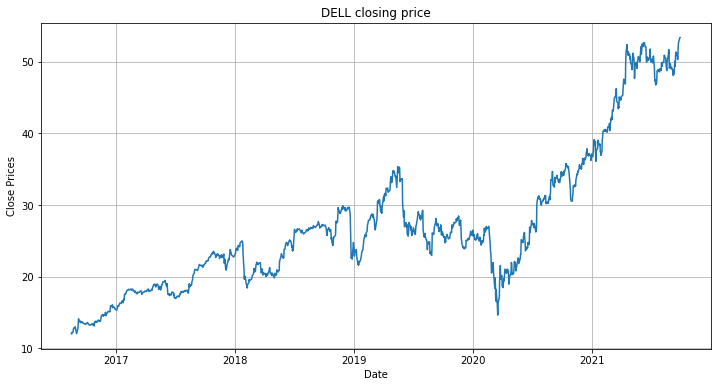

In [5]:
#plot close price
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(arima)
plt.title('DELL closing price')
plt.show()

# Dataset Probability Distribution:

<AxesSubplot:ylabel='Density'>

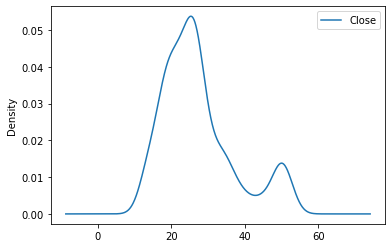

In [10]:
#Distribution of the dataset
DELL = arima
DELL.plot(kind='kde')

In [ ]:
# A time series is also regarded to include three systematic components: 
#level, trend, and seasonality, as well as one non-systematic component termed noise.

#1) The average value in the series is called the level.
#2)The increasing or falling value in the series is referred to as the trend.
#3)Seasonality is the series’ recurring short-term cycle.
#4)The random variance in the series is referred to as noise.

# Autocorrelation & Partial Autocorrelation

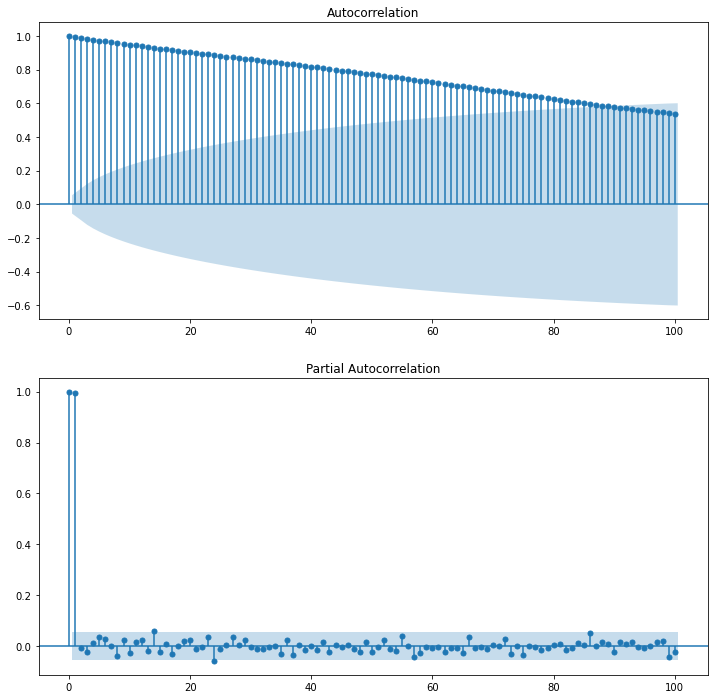

In [5]:
lags = 100

plt.figure(figsize=(12,12))
plt.subplot(211)
plot_acf(arima, ax=plt.gca(), lags = lags)

plt.subplot(212)
plot_pacf(arima, ax=plt.gca(), lags = lags)
plt.show()


# Rolling Statistics Test for staionarity:

In [7]:
Rolling = arima.reset_index()
for i in range(0, arima.shape[0]):
    n = i+1
    mean = sum(arima.head(n)['Close']/n)
    num = (arima['Close'][i] - mean)**2
    arima.loc[arima.index[i], 'Rolling Mean'] = mean
    arima.loc[arima.index[i], 'Rolling Variance'] = num/(n-1)

In [8]:
Rolling

,Date,Close,Rolling Mean,Rolling Variance
0,2016-08-17,12.067676,12.067676,NaN
1,2016-08-18,11.997515,12.032595,0.001231
2,2016-08-19,12.207997,12.091063,0.006837
3,2016-08-22,12.250094,12.130821,0.004742
4,2016-08-23,12.628963,12.230449,0.039703
...,...,...,...,...
1284,2021-09-23,52.047642,27.177426,0.481719
1285,2021-09-24,52.650787,27.197234,0.504189
1286,2021-09-27,53.152561,27.217402,0.523042
1287,2021-09-28,53.365433,27.237703,0.530426


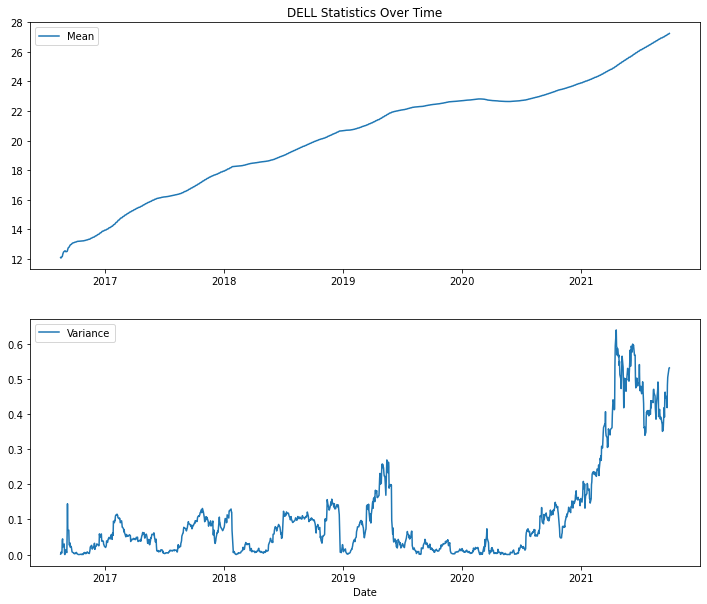

In [10]:
plt.figure(figsize = (12,10))
plt.subplot(211)
plt.title('DELL Statistics Over Time')
plt.plot(Rolling.Date, Rolling['Rolling Mean'], label='Mean')
plt.legend()
plt.subplot(212)
plt.plot(Rolling.Date, Rolling['Rolling Variance'], label='Variance')
plt.legend()
plt.xlabel('Date')
plt.show()

In [16]:
arima

,Close,Rolling Mean,Rolling Variance
Date,,,
2016-08-17,12.067676,12.067676,NaN
2016-08-18,11.997515,12.032595,0.001231
2016-08-19,12.207997,12.091063,0.006837
2016-08-22,12.250094,12.130821,0.004742
2016-08-23,12.628963,12.230449,0.039703
...,...,...,...
2021-09-23,52.047642,27.177426,0.481719
2021-09-24,52.650787,27.197234,0.504189
2021-09-27,53.152561,27.217402,0.523042


In [17]:
arima = arima[['Close']].copy()
arima

,Close
Date,
2016-08-17,12.067676
2016-08-18,11.997515
2016-08-19,12.207997
2016-08-22,12.250094
2016-08-23,12.628963
...,...
2021-09-23,52.047642
2021-09-24,52.650787
2021-09-27,53.152561


# ADF (Augmented Dickey-Fuller) Test for staionarity:

1) ADF test


In [18]:
# ADF test on DELL

result = adfuller(arima['Close'])
print('DELL')
print("ADF Statistic: %f" %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

DELL
ADF Statistic: 0.033507
p-value: 0.961217
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [ ]:

# Since the p-value is bigger than 0.05, the series non-stationary.
# the test statistics exceed the critical values. As a result, the data is nonlinear.

# Seasonality & Trend Strength:

In [19]:
from statsmodels.datasets import co2
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [20]:
data = arima['Close']
data = data.resample('M').mean().ffill()
data

Date
2016-08-31    12.521553
2016-09-30    13.414631
2016-10-31    13.397659
2016-11-30    14.200300
2016-12-31    15.398113
                ...    
2021-05-31    49.873796
2021-06-30    51.445883
2021-07-31    48.854778
2021-08-31    50.062203
2021-09-30    50.526356
Freq: M, Name: Close, Length: 62, dtype: float64

In [21]:
stl = STL(data)
res = stl.fit()

t = res.trend
s = res.seasonal
r = res.resid

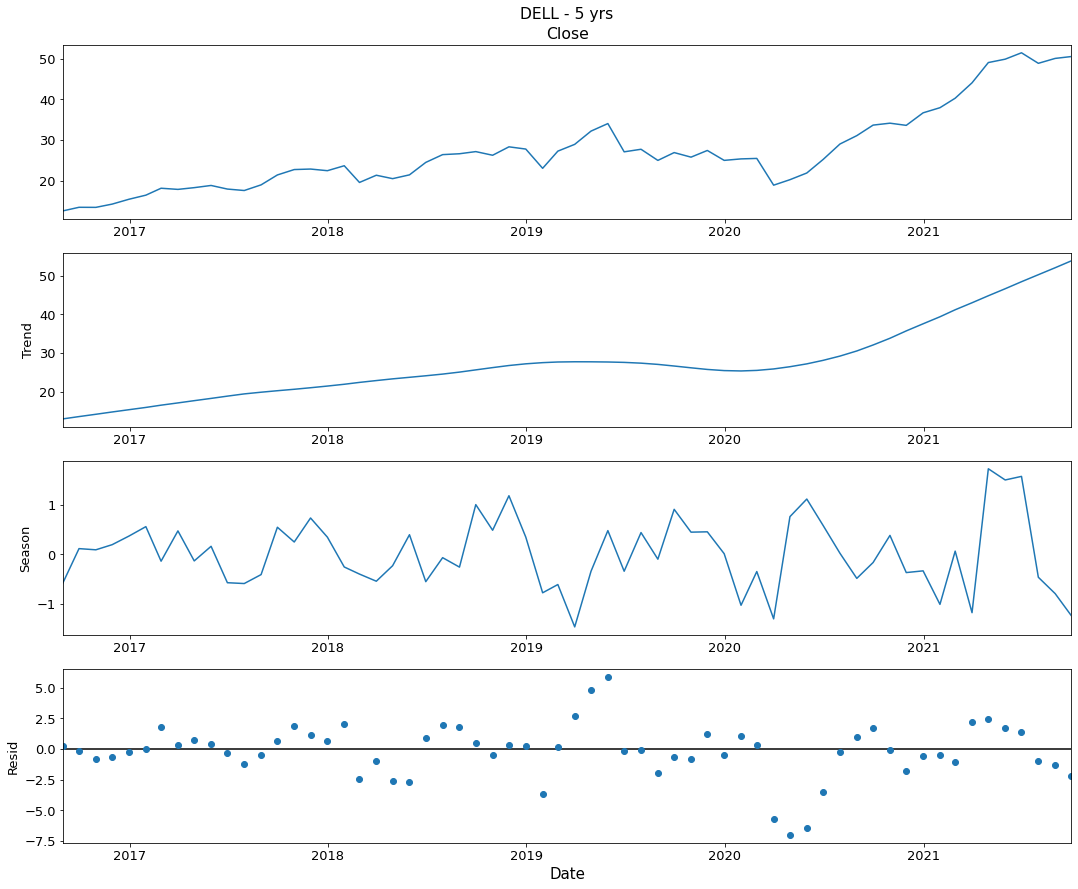

In [23]:
plt.rc('figure', figsize = (15,12))
plt.rc('font', size = 13)

res.plot()
plt.title('DELL - 5 yrs', pad = 650)
plt.xlabel('Date', fontsize =15)
plt.show()

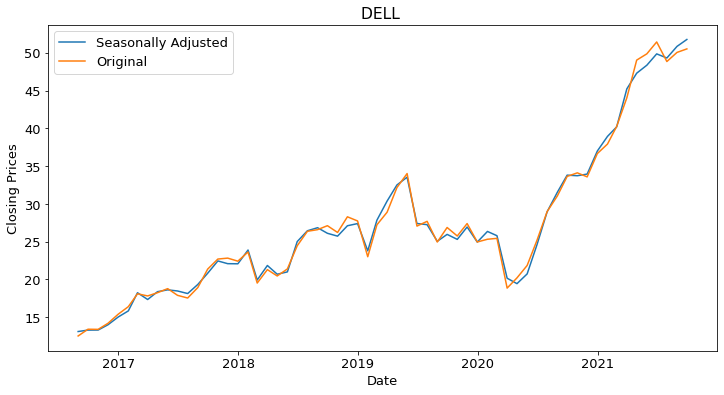

In [25]:
# Seasonally adjusted data
adjusted_seasonal = data - s

plt.figure(figsize=(12,6))
plt.plot(adjusted_seasonal, label='Seasonally Adjusted')
plt.plot(data, label='Original')
plt.title('DELL ')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

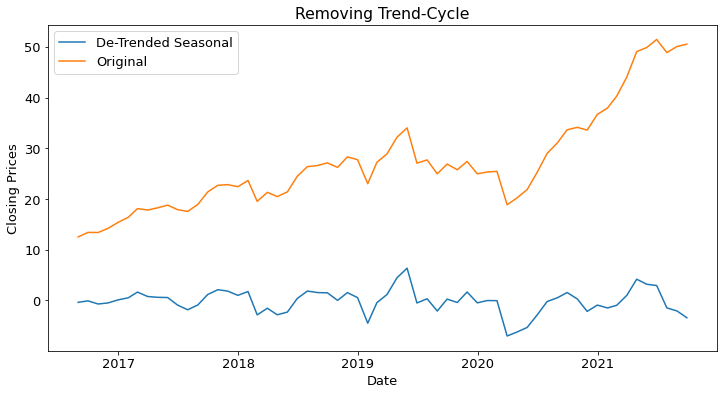

In [26]:
# Detrended data
detrended = data - t

plt.figure(figsize=(12,6))
plt.plot(detrended, label='De-Trended Seasonal')
plt.plot(data, label='Original')
plt.title('Removing Trend-Cycle')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

In [27]:
# Strength of trend & seasonality
r = np.array(r)
s = np.array(s)
t = np.array(t)
Ft = np.max([0,1-np.var(r)/np.var(t+r)])
Fs = np.max([0,1-np.var(r)/np.var(s+r)])
print('The strength of the trend for this dataset is = ', Ft)
print('The strength of the seasonality for this dataset is = ', Fs)

The strength of the trend for this dataset is =  0.95082642842545
The strength of the seasonality for this dataset is =  0.12002126306784322


In [ ]:
# To reduce of the growing trend in the series, we first take a log of the series. 
# We then calculate the rolling average of the series after obtaining the log of the series.
#A rolling average is computed by taking data from the previous 12 months and calculating a mean consumption value at each subsequent point in the series.

# Make Data Stationary

In [28]:
# First order differencing of the closing price
df_log1 = arima['Close'].diff()
df_log1

Date
2016-08-17         NaN
2016-08-18   -0.070161
2016-08-19    0.210483
2016-08-22    0.042097
2016-08-23    0.378869
                ...   
2021-09-23    1.733398
2021-09-24    0.603146
2021-09-27    0.501774
2021-09-28    0.212872
2021-09-29    0.045616
Name: Close, Length: 1289, dtype: float64

In [29]:
df_log = pd.DataFrame(data=df_log1)
df_log

,Close
Date,
2016-08-17,NaN
2016-08-18,-0.070161
2016-08-19,0.210483
2016-08-22,0.042097
2016-08-23,0.378869
...,...
2021-09-23,1.733398
2021-09-24,0.603146
2021-09-27,0.501774


In [30]:
# ADF test First order differencing 
result = adfuller(df_log[1:])
print('DELL First order differencing')
print("ADF Statistic: %f" %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

DELL First order differencing
ADF Statistic: -18.524777
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [44]:
df_log.to_csv('log_prices.csv')

# Plotting Rolling Mean and Standard Deviation After Differencing 

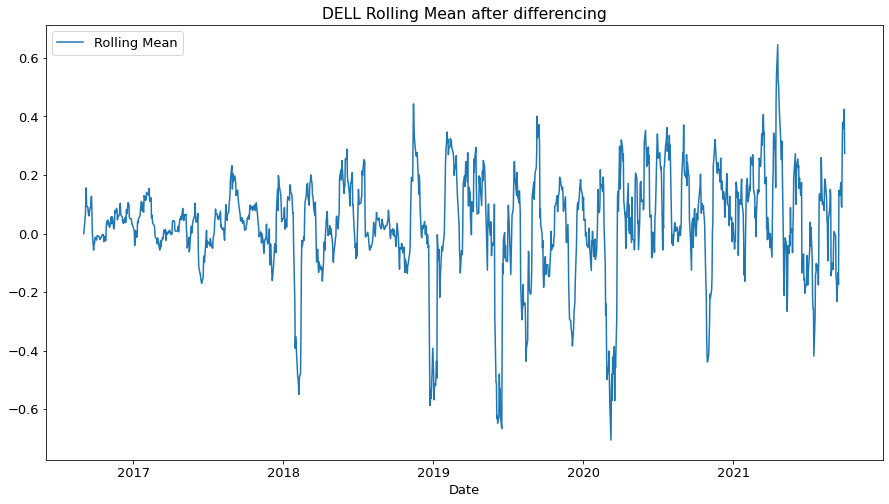

In [31]:
# Plotting mean 

rolling_mean = df_log.rolling(window = 12).mean()

plt.figure(figsize=(15,8))
plt.plot(rolling_mean, label = 'Rolling Mean')
plt.legend()
plt.title('DELL Rolling Mean after differencing')
plt.xlabel('Date')
plt.show()

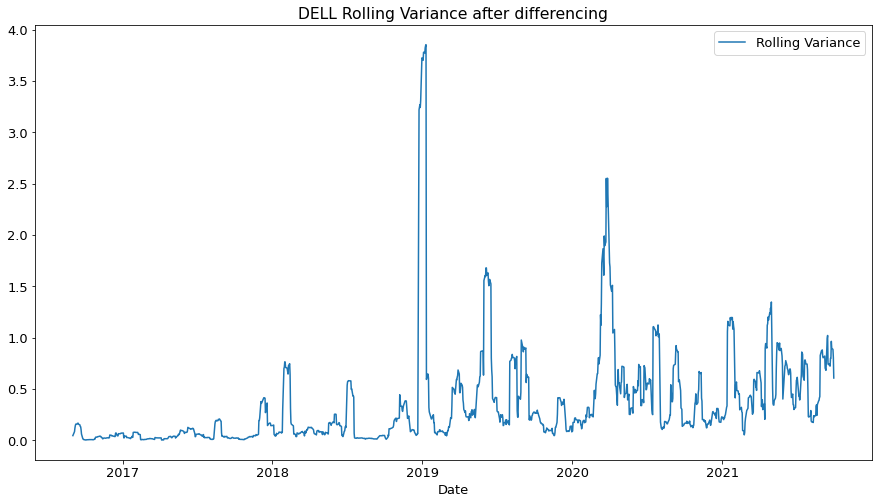

In [32]:
# plotting variance

rolling_var = df_log.rolling(window = 12).var()

plt.figure(figsize=(15,8))
plt.plot(rolling_var, label = 'Rolling Variance')
plt.legend()
plt.title('DELL Rolling Variance after differencing')
plt.xlabel('Date')
plt.show()

In [45]:
rolling_var.to_csv('rolling_var.csv')

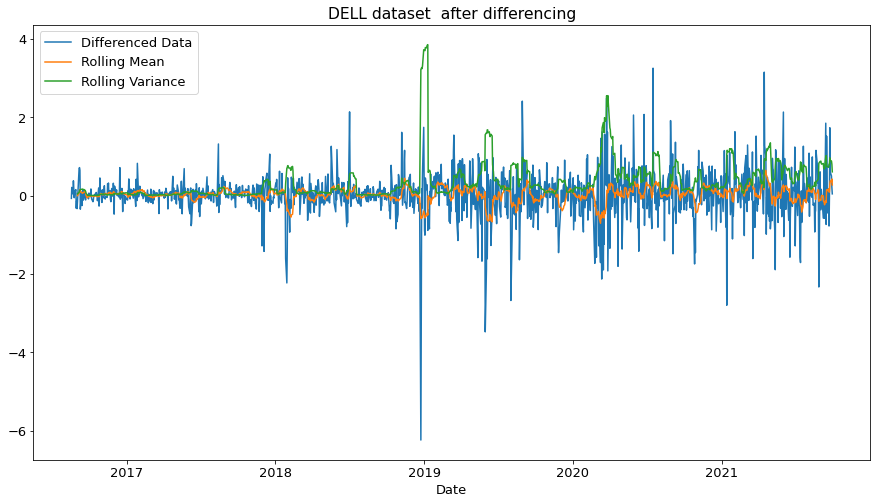

In [34]:
# plotting mean and variance together 

rolling_mean = df_log.rolling(window = 12).mean()
rolling_var = df_log.rolling(window = 12).var()


plt.figure(figsize=(15,8))
plt.plot(df_log.index.values, df_log, label = 'Differenced Data')
plt.plot(rolling_mean, label = 'Rolling Mean')
plt.plot(rolling_var, label = 'Rolling Variance')
plt.legend()
plt.title('DELL dataset  after differencing')
plt.xlabel('Date')
plt.show()

# Plotting DELL Stock Price After Differencing

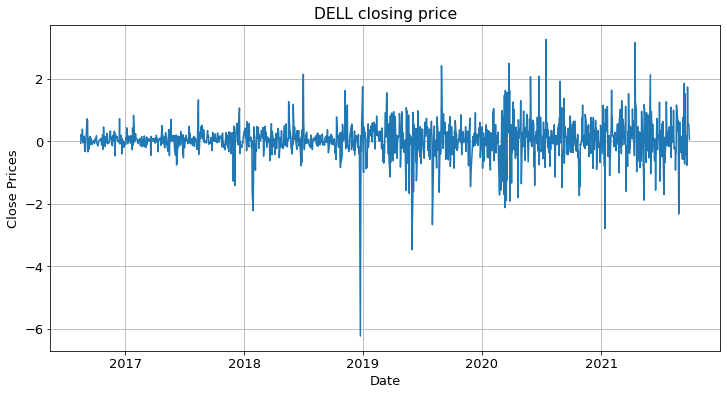

In [35]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df_log)
plt.title('DELL closing price')
plt.show()

# Autocorrelation & Partial Autocorrelation After Differencing (After Reaching Stationarity) (found HW4 $ HW 9)

In [36]:
def autocorr_cal(y, lags):
    
    ry = [1]
    mean = np.mean(y)

    for i in range(1, lags+1):
        sum_auto = 0
        for j in range(i, len(y)):
            sum_auto += (y[j]-mean)*(y[j-i]-mean)

        auto_cov = sum_auto/len(y)

        
        ry.append(auto_cov/np.var(y))
    return ry

            

In [37]:
df_log

,Close
Date,
2016-08-17,NaN
2016-08-18,-0.070161
2016-08-19,0.210483
2016-08-22,0.042097
2016-08-23,0.378869
...,...
2021-09-23,1.733398
2021-09-24,0.603146
2021-09-27,0.501774


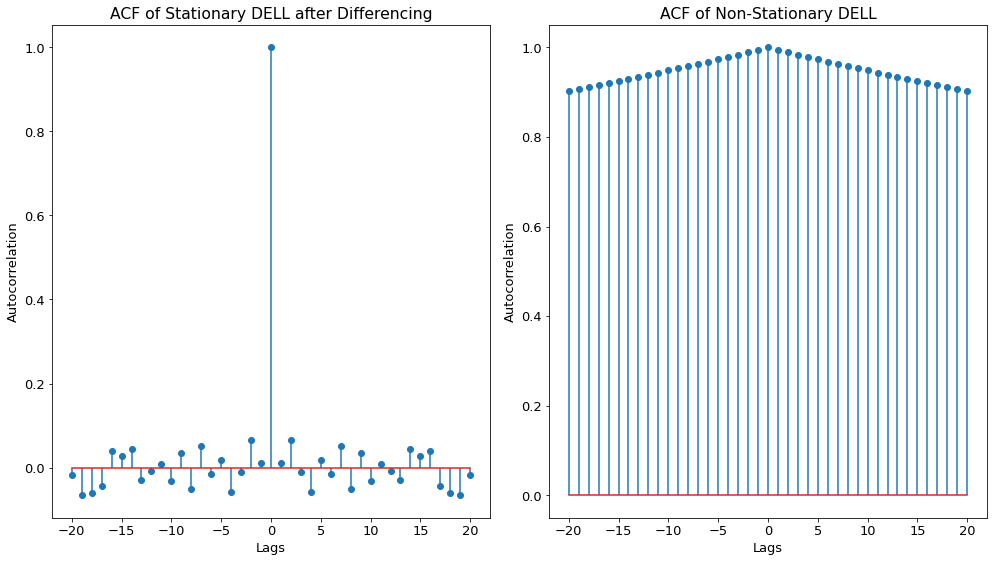

In [38]:
#def auocorr_cal(y, lags):

tau = 20
ry = autocorr_cal(df_log['Close'][1:], tau)
x = np.linspace(-20,20,41)

# Create reverse of ry, ryy
ryy = ry[::-1]
Ry = ryy + ry[1::]

# Plot autocorrelation
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(1,2,1)
ax1.stem(x, Ry, use_line_collection = True)
ax1.set(xlabel = 'Lags', ylabel = 'Autocorrelation')
ax1.set_title('ACF of Stationary DELL after Differencing')

# Find autocorrelation of APPLE at 20 lags
tau = 20
ry = autocorr_cal(arima['Close'], tau)

# Create reverse of ry, ryy
ryy = ry[::-1]
Ry = ryy + ry[1::]

# Plot 
ax2 = fig.add_subplot(1,2,2)
ax2.stem(x, Ry, use_line_collection = True)
ax2.set(xlabel = 'Lags', ylabel = 'Autocorrelation')
ax2.set_title('ACF of Non-Stationary DELL')

fig.tight_layout()
plt.show()
    

In [39]:
Ry

[0.9025701027599021,
 0.9067870863242169,
 0.9112569630336088,
 0.9159077781641295,
 0.9205951528732006,
 0.9249771653108989,
 0.9294829274222918,
 0.9337904037211111,
 0.9386582177998792,
 0.9433776773008407,
 0.9483352670646874,
 0.9534774456829976,
 0.9583575196455472,
 0.9634581702087371,
 0.9682223243315626,
 0.9730186110935055,
 0.9781186270066184,
 0.9835863261615448,
 0.9891909199569444,
 0.9946179640321693,
 1,
 0.9946179640321693,
 0.9891909199569444,
 0.9835863261615448,
 0.9781186270066184,
 0.9730186110935055,
 0.9682223243315626,
 0.9634581702087371,
 0.9583575196455472,
 0.9534774456829976,
 0.9483352670646874,
 0.9433776773008407,
 0.9386582177998792,
 0.9337904037211111,
 0.9294829274222918,
 0.9249771653108989,
 0.9205951528732006,
 0.9159077781641295,
 0.9112569630336088,
 0.9067870863242169,
 0.9025701027599021]

In [40]:
def GPAC_cal(Ry, k, j): # RY is the estimated autocorrelation
    
    for c in range(1, k):
        
        if c == 1:
            phi_col = []
            for i in range(j):
                start = len(Ry)//2 + i + 1
                num = Ry[start]
                den = Ry[start-1]
                phi_col.append((num/den).tolist())
                matrix1 = np.array(phi_col)

        elif c == 2:
            phi_col = []
            for i in range(j):  
                start = len(Ry)//2 + i
                l_col = Ry[start:start+c] 
                r_num = Ry[start+1:start+c+1]  
                num = np.column_stack((l_col,r_num))
                r_den = Ry[start-1:start+c-1]
                den = np.column_stack((l_col,r_den))
                phi_col.append(np.linalg.det(num)/np.linalg.det(den))
            matrix2 = np.array(phi_col).reshape(j,1)
            matrix = np.column_stack((matrix1,matrix2))
        else:
            phi_col = []
            for i in range(j):
                col = []
                for a in range(c-1): 
                    start = len(Ry)//2 + i
                    col.append(Ry[start-a:start+c-a].tolist())
                col = np.array(col).T
                r_num = Ry[start+1:start+c+1]
                r_den = Ry[start-c+1:start+1]
                num = np.column_stack((col,r_num))
                den = np.column_stack((col,r_den))
                phi_col.append(np.linalg.det(num)/np.linalg.det(den))
            matrix3 = np.array(phi_col)
            matrix = np.column_stack((matrix,matrix3))
    plt.figure(figsize=(12,8))
    sns.heatmap(matrix, annot=True, annot_kws={'size':15}, fmt='.3f', xticklabels=np.arange(1, k, step=1))
    sns.color_palette('rocket')
    plt.show()

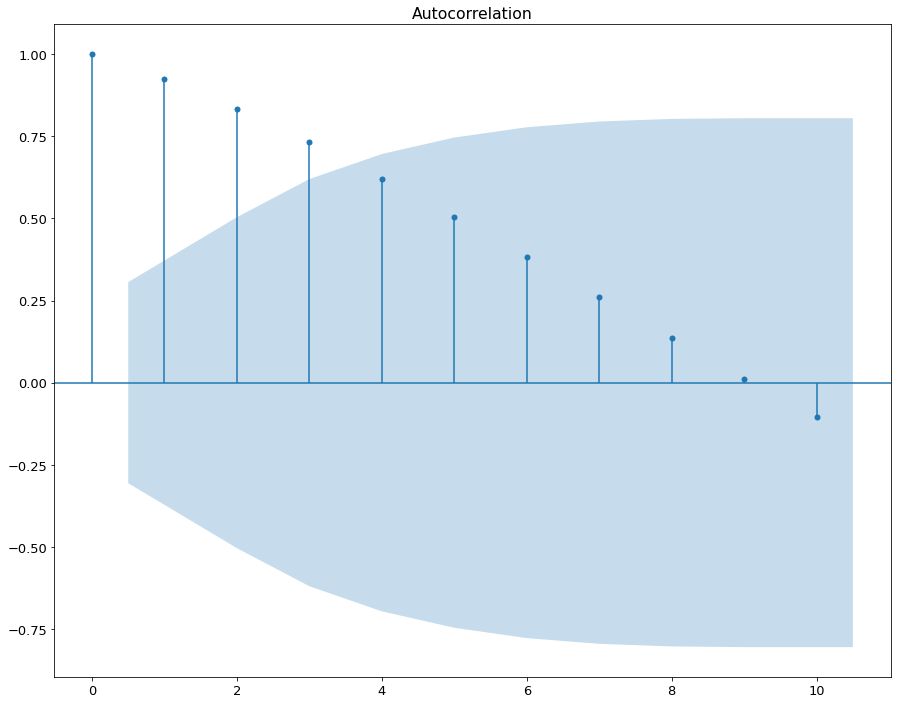

In [41]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(Ry, lags=10)
plt.show()


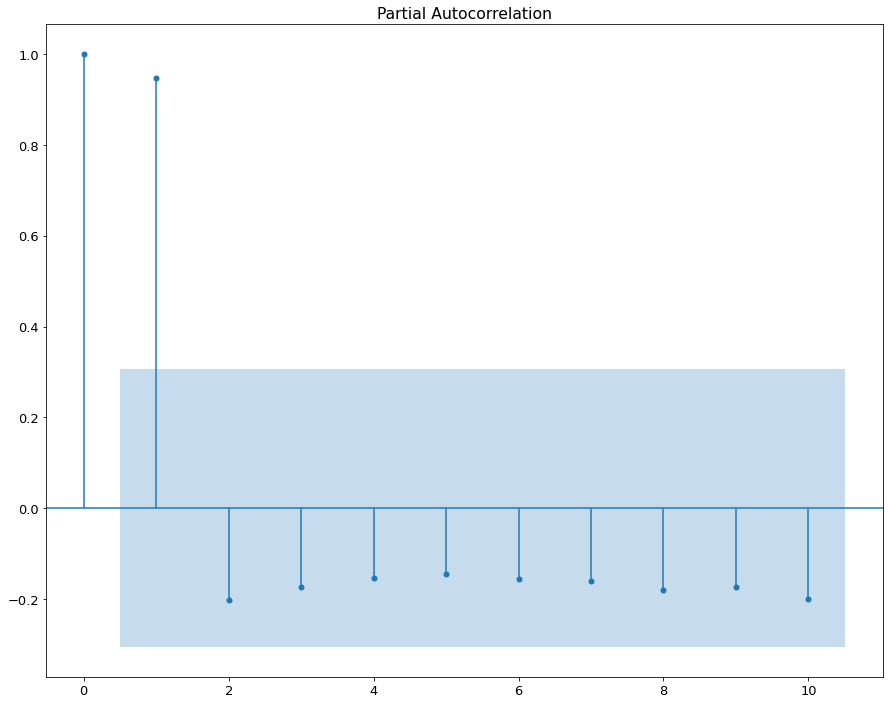

In [42]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_pacf(Ry, lags=10)
plt.show()

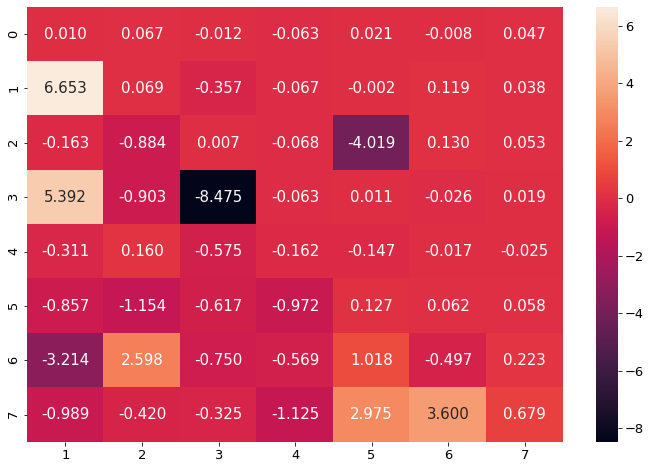

In [43]:
# Plot ACF & PACF
lags = 100

# GPAC
ry = sm.tsa.stattools.acf(df_log[1:], nlags=lags)
ry1 = ry[::-1]
Ry = np.concatenate((ry1[0:-1], ry))
GPAC_cal(Ry,8,8)

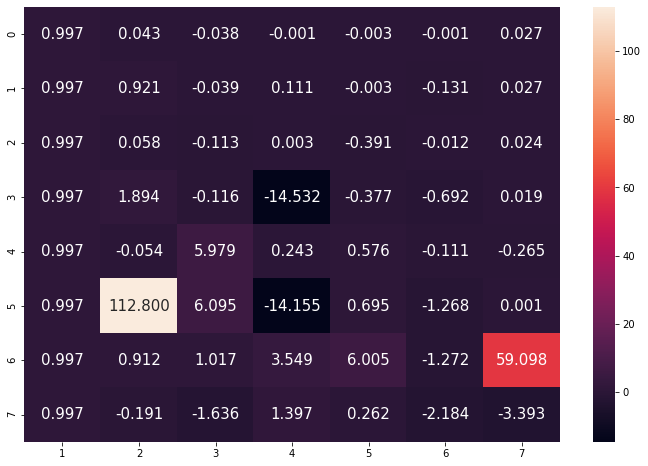

In [46]:
# #Plot ACF & PACF
#lags = 100

#GPAC
#ry = sm.tsa.stattools.acf(arima, nlags=lags)
#ry1 = ry[::-1]
#Ry = np.concatenate((ry1[0:-1], ry))
#GPAC_cal(Ry,8,8)

# Splitting data into training and testing

In [44]:
arima['Close']

Date
2016-08-17    12.067676
2016-08-18    11.997515
2016-08-19    12.207997
2016-08-22    12.250094
2016-08-23    12.628963
                ...    
2021-09-23    52.047642
2021-09-24    52.650787
2021-09-27    53.152561
2021-09-28    53.365433
2021-09-29    53.411049
Name: Close, Length: 1289, dtype: float64

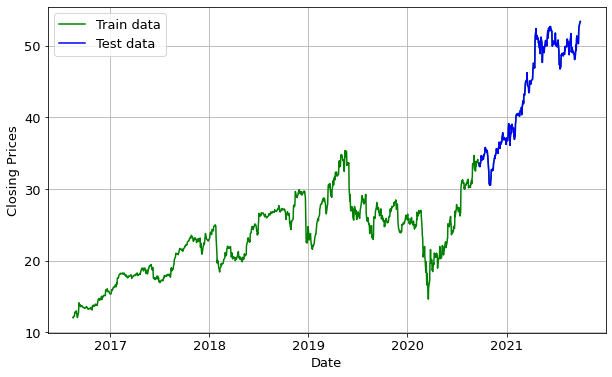

In [45]:
#split data into train and training set
train_data, test_data = arima['Close'][0:int(len(arima['Close'])*0.80)], arima['Close'][int(len(arima['Close'])*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(arima['Close'], 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [46]:
print(len(train_data))
print(len(test_data))

1031
258


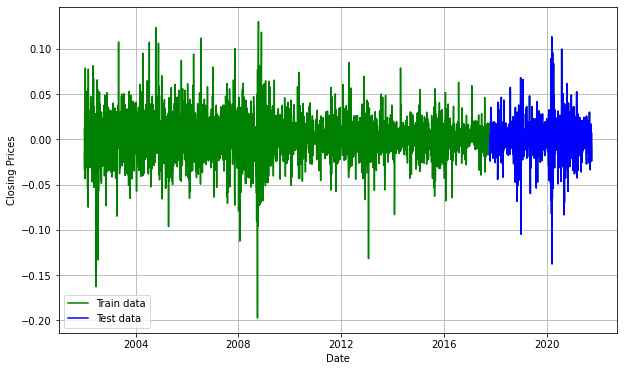

In [38]:
#split data into train and training set
train_data, test_data = df_log1[0:int(len(df_log1)*0.8)], df_log1[int(len(df_log1)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(df_log1, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

# Naive Model

In [6]:
# the last period value is the forecat for this period

naive = arima
naive

,Close
Date,
2016-08-17,12.067676
2016-08-18,11.997515
2016-08-19,12.207997
2016-08-22,12.250094
2016-08-23,12.628963
...,...
2021-09-23,52.047642
2021-09-24,52.650787
2021-09-27,53.152561


In [7]:
naive ['lag'] = arima['Close'].shift(1)
naive

,Close,lag
Date,,
2016-08-17,12.067676,NaN
2016-08-18,11.997515,12.067676
2016-08-19,12.207997,11.997515
2016-08-22,12.250094,12.207997
2016-08-23,12.628963,12.250094
...,...,...
2021-09-23,52.047642,50.314243
2021-09-24,52.650787,52.047642
2021-09-27,53.152561,52.650787


In [8]:
# splitting data into 80 training 20 test

train, test = naive[1:naive.shape[0]-258], naive[naive.shape[0]-258:]

In [9]:
train_x, train_y = train['lag'], train['Close']
test_x, test_y = test['lag'], test['Close']

In [10]:
forecast = test_x.copy()


In [11]:
print(forecast)
print(test_y)

# the first are the forecasted values and the second are the actual values
# as we see the value of 2020-12-30 is the predicted values for price 2020-12-31

Date
2020-09-22    33.198174
2020-09-23    33.608719
2020-09-24    33.253929
2020-09-25    33.132286
2020-09-28    33.309681
                ...    
2021-09-23    50.314243
2021-09-24    52.047642
2021-09-27    52.650787
2021-09-28    53.152561
2021-09-29    53.365433
Name: lag, Length: 258, dtype: float64
Date
2020-09-22    33.608719
2020-09-23    33.253929
2020-09-24    33.132286
2020-09-25    33.309681
2020-09-28    34.115559
                ...    
2021-09-23    52.047642
2021-09-24    52.650787
2021-09-27    53.152561
2021-09-28    53.365433
2021-09-29    53.411049
Name: Close, Length: 258, dtype: float64


In [12]:
mse = mean_squared_error(test_y, forecast)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_y, forecast)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_y, forecast))
print('RMSE: '+str(rmse))

MSE: 0.5065413790948943
MAE: 0.5193364934403767
RMSE: 0.7117172044393013


In [13]:
def train_MSE(error_sq):
    
    return sum(error_sq.fillna(0))/(len(error_sq) - 1)

In [14]:
def test_MSE(error_sq):

    return sum(error_sq)/(len(error_sq))  

# Alternatively for MSE: mse = np.square(np.subtract(y_test,prediction)).mean()

In [15]:
def variance(error_sq):

    return sum(error_sq.fillna(0))/(len(arima['Close']) - 1)

In [16]:
# Copy training dataframe
naive = arima.copy(deep = True)

# Generate close(t-1)
for i in range(0, naive.shape[0]-1):
     naive.loc[naive.index[i+1], 'naive'] = naive['Close'][i]

# Generate error term
for i in range(1, naive.shape[0]):
    naive.loc[naive.index[i], 'naive_e'] = naive['Close'][i] - naive['naive'][i]

# Generate squared error
for i in range(1, naive.shape[0]):
    naive.loc[naive.index[i], 'naive_e^2'] = naive['naive_e'][i]**2

# split data to train and test
train = naive[:1031]
test = naive[1031:]

# Get MSE for naive train and test sets
naive_train_MSE = train_MSE(train['naive_e^2'])
naive_test_MSE = test_MSE(test['naive_e^2'])
naive

,Close,lag,naive,naive_e,naive_e^2
Date,,,,,
2016-08-17,12.067676,NaN,NaN,NaN,NaN
2016-08-18,11.997515,12.067676,12.067676,-0.070161,0.004923
2016-08-19,12.207997,11.997515,11.997515,0.210483,0.044303
2016-08-22,12.250094,12.207997,12.207997,0.042097,0.001772
2016-08-23,12.628963,12.250094,12.250094,0.378869,0.143542
...,...,...,...,...,...
2021-09-23,52.047642,50.314243,50.314243,1.733398,3.004670
2021-09-24,52.650787,52.047642,52.047642,0.603146,0.363785
2021-09-27,53.152561,52.650787,52.650787,0.501774,0.251777


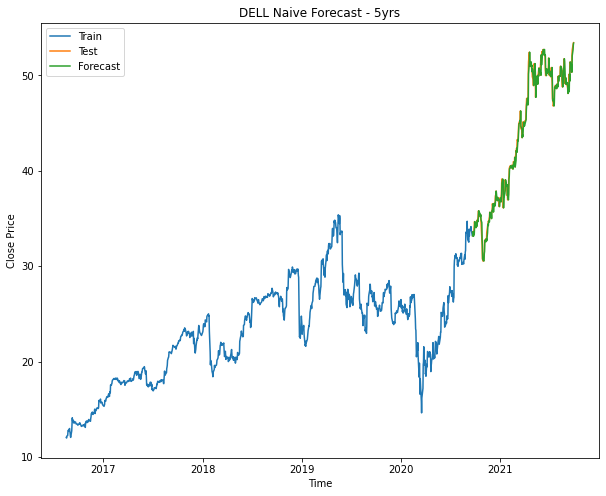

In [17]:
plt.figure(figsize = (10,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, test['naive'], label='Forecast')
plt.title('DELL Naive Forecast - 5yrs')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(loc='best')
plt.show()

In [62]:
# Print MSE results
print('MSE of prediction errors: ', naive_train_MSE)
print('MSE of forecast errors: ', naive_test_MSE)

MSE of prediction errors:  0.30914326403978337
MSE of forecast errors:  0.5065413790948943


# ARIMA Model

In [ ]:
# Auto ARIMA: Automatically discover the optimal order for an ARIMA model. 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1716.441, Time=0.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1717.285, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1717.392, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1715.844, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1717.674, Time=0.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.925 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1031
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -856.922
Date:                Sat, 20 Nov 2021   AIC                           1715.844
Time:                        22:30:04   BIC                           1720.782
Sample:                             0   HQIC                          1717.718
                               - 1031                                       

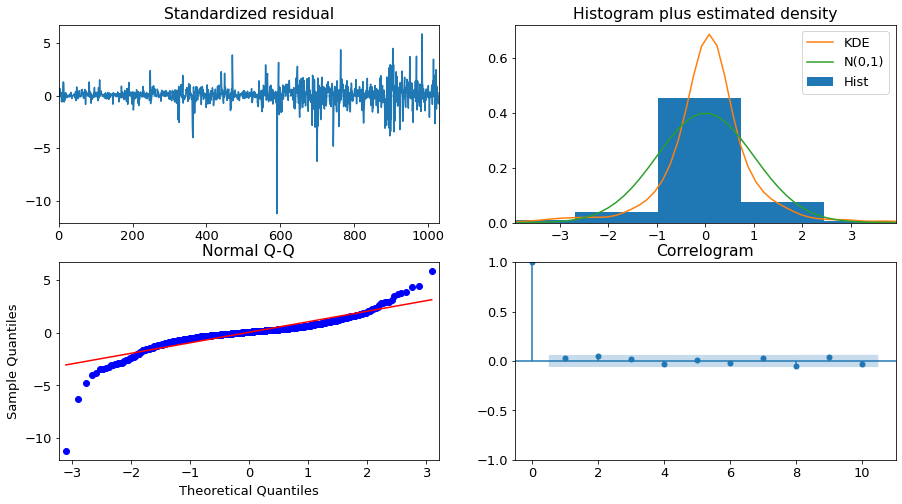

In [68]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
#Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

#Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

#Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

#Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

# Modeling:


In [78]:
# Build Model
# if differencing is involved then train data must be raw data that is non stationary
# develop forecasting function after building the model

#  fit a model using training data, and then to evaluate its performance on a test data set.
model = ARIMA(train_data, order=(0,1,0))  
fitted = model.fit() 
print(fitted.summary())



#from statsmodels.tsa.arima_model import ARMA
#from statsmodels.tsa.arima.model import ARIMA

#model = ARMA(train_data, order=(1, 1))# fit model
#fitted = model.fit(disp=-1)  
#print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1030
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -856.221
Method:                           css   S.D. of innovations              0.556
Date:                Sat, 20 Nov 2021   AIC                           1716.441
Time:                        22:32:32   BIC                           1726.316
Sample:                             1   HQIC                          1720.189
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0205      0.017      1.185      0.236      -0.013       0.054


# Forecasting

In [70]:
# ARIMA Walk Forward

data = train_data
predict = []
for t in test_data:
    model = ARIMA(data, order=(0,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data,t)
    data = pd.Series(data)

33.218688567852496
33.62961221918861
33.27445845363676
33.15267775270462
33.33022446420156
34.136860918809354
34.68983334371942
34.32960582056356
34.25348881719659
34.06068263986921
34.59335480928421
34.222983475159616
34.18745233860193
34.82159198930619
34.68459158627565
35.12087437450209
35.76008612189356
35.83108947247466
35.521599239065445
35.57738287229488
35.247599088578
35.2019185464402
35.41497536666493
34.88226430723034
34.57785139781198
32.832640625860165
32.23905430802213
30.783020628713924
30.691687289167668
30.559765614639264
30.57497079543788
31.315640124758904
31.559136365102876
32.715805822194866
32.75637593036308
32.57879625112429
32.76648464256559
32.9034431666
32.67005993007274
33.527402922673296
34.15645818710327
34.4151679814303
34.283246887759006
34.739810404106485
34.65862240476273
35.186208063656444
35.668138121830324
35.1709486630557
35.409366162269684
35.00856913873627
35.764444346917706
35.76442406993368
35.962256493326066
36.56593483108563
35.693340816181085

In [71]:
predict

[33.218688567852496,
 33.62961221918861,
 33.27445845363676,
 33.15267775270462,
 33.33022446420156,
 34.136860918809354,
 34.68983334371942,
 34.32960582056356,
 34.25348881719659,
 34.06068263986921,
 34.59335480928421,
 34.222983475159616,
 34.18745233860193,
 34.82159198930619,
 34.68459158627565,
 35.12087437450209,
 35.76008612189356,
 35.83108947247466,
 35.521599239065445,
 35.57738287229488,
 35.247599088578,
 35.2019185464402,
 35.41497536666493,
 34.88226430723034,
 34.57785139781198,
 32.832640625860165,
 32.23905430802213,
 30.783020628713924,
 30.691687289167668,
 30.559765614639264,
 30.57497079543788,
 31.315640124758904,
 31.559136365102876,
 32.715805822194866,
 32.75637593036308,
 32.57879625112429,
 32.76648464256559,
 32.9034431666,
 32.67005993007274,
 33.527402922673296,
 34.15645818710327,
 34.4151679814303,
 34.283246887759006,
 34.739810404106485,
 34.65862240476273,
 35.186208063656444,
 35.668138121830324,
 35.1709486630557,
 35.409366162269684,
 35.00856913

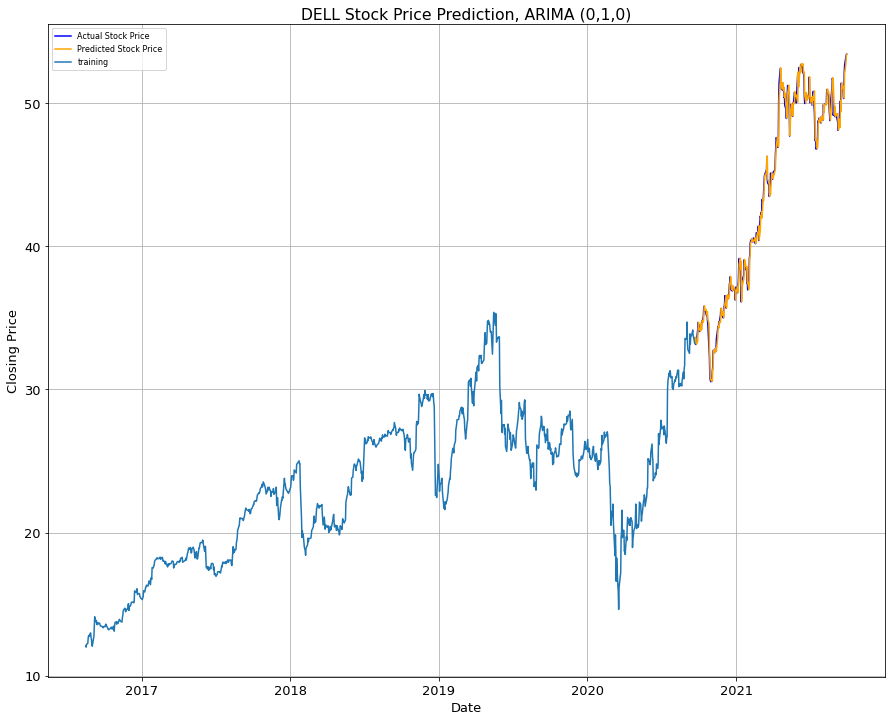

In [75]:
predict = pd.Series(predict, index=test_data.index)
#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)

plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(predict, color = 'orange',label='Predicted Stock Price')
plt.plot(train_data, label='training')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=0.10)
plt.title('DELL Stock Price Prediction, ARIMA (0,1,0)')
plt.xlabel('Date')
plt.grid(True)
plt.ylabel('Closing Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy Measures:

In [76]:
# Model Performance
mse = mean_squared_error(test_data, predict)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, predict)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, predict))
print('RMSE: '+str(rmse))

MSE: 0.5035077231866301
MAE: 0.5184407899441682
RMSE: 0.7095827810668958


In [77]:
Accuracy = pd.DataFrame({'MSE':mse, 'MAE': mae, 'RMSE':rmse}, index=[1])
Accuracy

,MSE,MAE,RMSE
1,0.503508,0.518441,0.709583


In [ ]:
# p Autoregressive -  Yt = a+ b1Yt-1 + b2Yt-2 + error 1

# when p = 2

#stock price today(yt)(Nov 8) = a + b1(price yesterday)(Nov 7) + b2(price day before )(Nov 6) + error   


# q Moving Average - Yt = a + Et + b1Et-1 + b2Et-2

#the present value of time series model are dependent on its past values and on the error of past values. the error is the difference between actual 
#values and predicted values. 

# q determines the number of past lag values error used to predict yt (determined by ACF Plot)

# Hyperparameter Tunning (p,d,q)

In [79]:
train,test = arima[:801], arima[801:]

In [177]:
train

Date
2018-01-02     43.064999
2018-01-03     43.057499
2018-01-04     43.257500
2018-01-05     43.750000
2018-01-08     43.587502
                 ...    
2021-03-03    122.059998
2021-03-04    120.129997
2021-03-05    121.419998
2021-03-08    116.360001
2021-03-09    121.089996
Name: Close, Length: 801, dtype: float64

In [80]:
test

,AAPL
Date,
2021-03-10,121.03
2021-03-11,123.99
2021-03-12,125.57
2021-03-15,124.76
2021-03-16,120.53
...,...
2021-09-23,146.83
2021-09-24,146.92
2021-09-27,145.37


In [81]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [83]:
p_values = range(0, 8)
d_values = range(0, 1) #this is the range for the values
q_values = range(0, 0) #this is the range for the values

In [84]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = arima[:754], arima[754:]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test, predictions)
                    print('Best ARIMA%s , MSE = %.2f' % (order, error))
                except:
                    continue
          

Best ARIMA(0, 0, 0) , MSE = 4949.47
Best ARIMA(0, 0, 1) , MSE = 1527.38
Best ARIMA(0, 0, 2) , MSE = 1258.64
Best ARIMA(1, 0, 0) , MSE = 133.24
Best ARIMA(2, 0, 0) , MSE = 128.05
